Création du dataset

In [1]:
#Je met les liens des images d'un coté et le folder + id de l'autre
import tensorflow as tf


base_path = '/Users/orphila_adjovi/PJT6_Open_classrooms_MLE/Images'

image_size = (224, 224)  # Taille images
batch_size = 120  # Taille de lot

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=0,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=0,
    image_size=image_size,
    batch_size=batch_size,
    #label_mode=None
)

all_classes = train_ds.class_names
print("Noms des sous-dossiers (class_names) :", all_classes)

2024-02-09 10:55:31.676378: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
Noms des sous-dossiers (class_names) : ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093

Création de l'échantillon

In [2]:
path_2 = '/Users/orphila_adjovi/PJT6_Open_classrooms_MLE/img'

train_ds_sample = tf.keras.utils.image_dataset_from_directory(
    path_2,
    validation_split=0.2,
    subset="training",
    seed=0,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds_sample = tf.keras.utils.image_dataset_from_directory(
    path_2,
    validation_split=0.2,
    subset="validation",
    seed=0,
    image_size=image_size,
    batch_size=batch_size,
)

sample_classes = train_ds_sample.class_names
print("Noms des sous-dossiers (class_names) :", sample_classes)


Found 497 files belonging to 3 classes.
Using 398 files for training.


Found 497 files belonging to 3 classes.
Using 99 files for validation.
Noms des sous-dossiers (class_names) : ['n02085620-Chihuahua', 'n02088364-beagle', 'n02099601-golden_retriever']


In [3]:
# Afficher la distribution des classes
import numpy as np
class_counts = []

# Compte du nb d'échantillons par classe
for images, labels in train_ds_sample:
    class_counts.extend(labels.numpy())

# Nb d'échantillons par classe
unique_classes, counts = np.unique(class_counts, return_counts=True)

for cls, count in zip(unique_classes, counts):
    print(f"Classe {cls}: {count} échantillons")



Classe 0: 123 échantillons
Classe 1: 157 échantillons
Classe 2: 118 échantillons


Visualisation des images

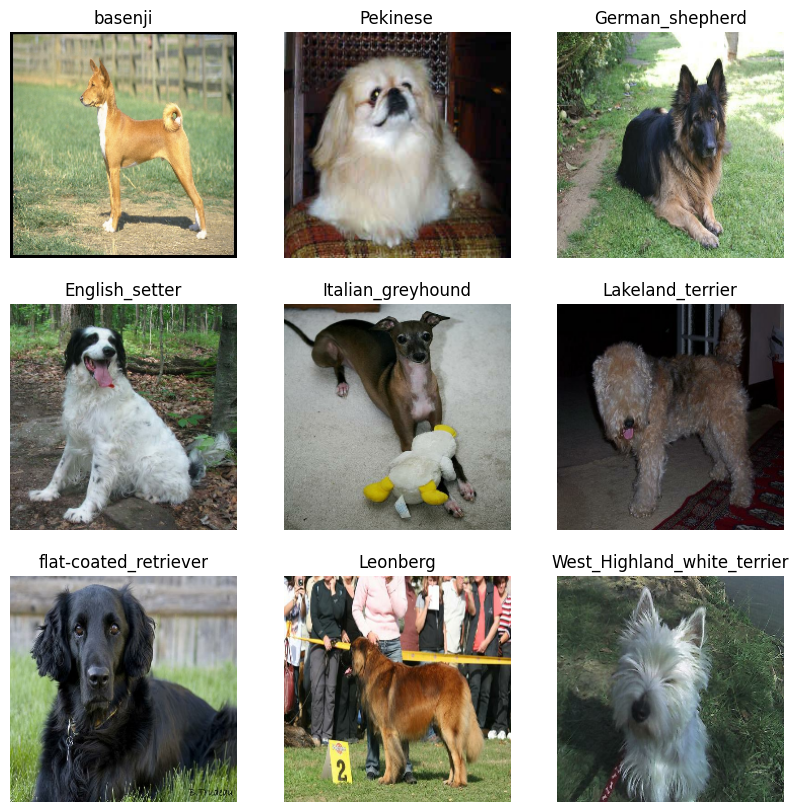

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        label = labels[i].numpy()
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(all_classes[label][10:])
        plt.axis("off")

Data augmentation

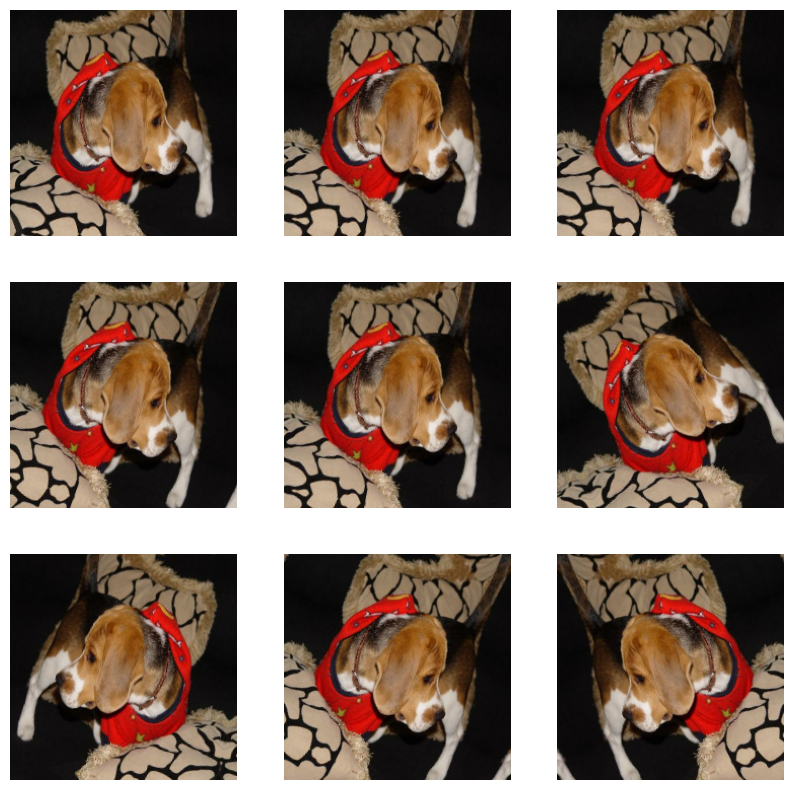

In [6]:
#Génération de transformations aléatoires sur les images afin d'épaissir le dataset d'entraiment et d'avoir un modèle plus généralisé
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

plt.figure(figsize=(10, 10))
for images, _ in train_ds_sample.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))        
        plt.axis("off")

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation_2_layers = [
    layers.RandomZoom(0.2),
]

def data_augmentation_2(images):
    for layer in data_augmentation_2_layers:
        images = layer(images)
    return images

# Afficher la même image avec un zoom aléatoire différent neuf fois
plt.figure(figsize=(10, 10))
for images, _ in train_ds_sample.take(1):
    image = images[0]
    for i in range(9):
        augmented_image = data_augmentation_2(tf.expand_dims(image, axis=0))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_image[0]).astype("uint8"))
        plt.axis("off")

Standardisation des données

In [9]:
#Scaling du nombre de pixels 
def data_standardisation(images):
    """output = (input-offset)/scale, offset à zéro"""
    images = layers.Rescaling(scale=1.5)(images)
    print("Forme de la sortie :", images.shape)
    return images

def print_avant_apres(transformation):

    for images, labels in train_ds_sample.take(1):
        sample_image = images[0]

        transformed_image = transformation(sample_image)
        img1 = sample_image.numpy().astype("uint8")
        img2 = transformed_image.numpy().astype("uint8")

        plt.subplot(1, 2, 1)
        plt.imshow(img1)
        plt.title("Image originale")
        plt.axis("off")
        plt.subplot(1, 2, 2)
        plt.imshow(img2)
        plt.title("Image après traitement")
        plt.axis("off")

print_avant_apres(data_standardisation)

Forme de la sortie : (224, 224, 3)


Data equalization

In [10]:
#Ajuster la distribution des pixels pour améliorer le contraste

import numpy as np
import cv2 #OpenCV

def data_equalization(images):

    images = tf.cast(images, dtype=tf.uint8)
    # Convertir les images TensorFlow en tableau NumPy
    images_np = images.numpy()
    # Appliquer l'égalisation d'histogramme avec OpenCV
    equalized_images_np = np.array([cv2.equalizeHist(img) for img in images_np])
    # Convertir les images NumPy en images TensorFlow
    equalized_images = tf.convert_to_tensor(equalized_images_np, dtype=tf.float32)
    print("Forme de la sortie :", images.shape)
    return equalized_images

print_avant_apres(data_equalization)

Forme de la sortie : (224, 224, 3)


Conversion en niveaux de gris

Forme de la sortie : (224, 224, 3)


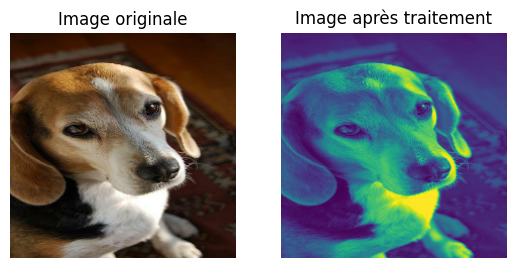

In [11]:
def convert_to_grayscale(images):
    # Vérifier le nombre de canaux (channels) dans l'image
    if images.shape[-1] == 3:
        # Convertir en niveaux de gris avec TensorFlow
        grayscale_images = tf.image.rgb_to_grayscale(images)
        print("Forme de la sortie :", images.shape)
        return grayscale_images
    else:
        # Si l'image n'a pas trois canaux, renvoyer l'image telle quelle
        return images

(print_avant_apres(convert_to_grayscale))

Combinaison des traitements d'image

Forme de la sortie : (224, 224, 3)
Forme de la sortie : (224, 224, 1)
Forme de la sortie : (224, 224, 1)


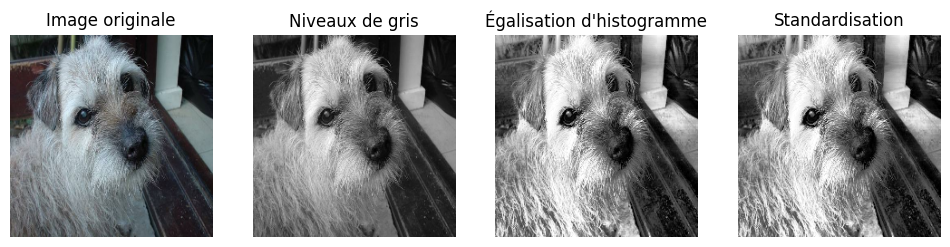

In [12]:
# Fonction pour afficher les étapes successives de traitement
def afficher_etapes_traitement(image):
    # Afficher l'image originale
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 4, 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("Image originale")
    plt.axis("off")

    # Convertir en niveaux de gris
    grayscale_image = convert_to_grayscale(image)
    plt.subplot(1, 4, 2)
    plt.imshow(grayscale_image.numpy().squeeze(), cmap='gray')
    plt.title("Niveaux de gris")
    plt.axis("off")

    # Égalisation d'histogramme
    equalized_image = data_equalization(grayscale_image)
    plt.subplot(1, 4, 3)
    plt.imshow(equalized_image.numpy().squeeze(), cmap='gray')
    plt.title("Égalisation d'histogramme")
    plt.axis("off")

    # Standardisation
    standardized_image = data_standardisation(equalized_image)
    plt.subplot(1, 4, 4)
    plt.imshow(standardized_image.numpy().squeeze(), cmap='gray')
    plt.title("Standardisation")
    plt.axis("off")

    plt.show()

# Exemple d'utilisation avec une image du dataset
for images, labels in train_ds.take(1):
    sample_image = images[0]
    afficher_etapes_traitement(sample_image)
